In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm

from energy_consumption.feature_selection.extract import extract_energy_data, extract_all_features
from energy_consumption.help_functions import get_forecast_timestamps, create_submission_frame
from energy_consumption.feature_selection.clean.impute_outliers import impute_outliers

In [2]:
energydata = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\feature_selection\\data\\historical_data.csv')
energydata['date_time'] = pd.to_datetime(
    energydata['date_time'], format='%Y-%m-%d %H:%M:%S')
energydata = energydata.set_index("date_time")
energydata = impute_outliers(energydata)

In [3]:
energydata_knn = extract_all_features.get_energy_and_standardized_features2(energydata, knn=True)
energydata_knn

2016-12-26 00:00:00
2023-11-23 12:00:00


,sun_hours,tavg,wspd,index,energy_consumption,hour_1,hour_2,hour_3,hour_4,hour_5,...,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,year_2023,year_2024,holiday
date_time,,,,,,,,,,,,,,,,,,,,,
2016-12-26 00:00:00,-1.499845,-0.514633,1.989731,-0.780066,41.81025,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2016-12-26 01:00:00,-1.499845,-0.514633,1.989731,-0.780066,39.73950,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2016-12-26 02:00:00,-1.499845,-0.514633,1.989731,-0.780066,38.78525,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2016-12-26 03:00:00,-1.499845,-0.514633,1.989731,-0.780066,38.96900,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2016-12-26 04:00:00,-1.499845,-0.514633,1.989731,-0.780066,39.18750,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 08:00:00,-1.266314,-1.520067,-0.580195,-1.968927,65.75125,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2023-11-22 09:00:00,-1.266314,-1.520067,-0.580195,-1.968927,67.40950,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2023-11-22 10:00:00,-1.266314,-1.520067,-0.580195,-1.968927,68.26775,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
y = energydata_knn[['energy_consumption']]
X = energydata_knn.drop(columns=['energy_consumption'])
X

,sun_hours,tavg,wspd,index,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,...,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,year_2023,year_2024,holiday
date_time,,,,,,,,,,,,,,,,,,,,,
2016-12-26 00:00:00,-1.499845,-0.514633,1.989731,-0.780066,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2016-12-26 01:00:00,-1.499845,-0.514633,1.989731,-0.780066,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2016-12-26 02:00:00,-1.499845,-0.514633,1.989731,-0.780066,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2016-12-26 03:00:00,-1.499845,-0.514633,1.989731,-0.780066,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2016-12-26 04:00:00,-1.499845,-0.514633,1.989731,-0.780066,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 08:00:00,-1.266314,-1.520067,-0.580195,-1.968927,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2023-11-22 09:00:00,-1.266314,-1.520067,-0.580195,-1.968927,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2023-11-22 10:00:00,-1.266314,-1.520067,-0.580195,-1.968927,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.metrics import mean_squared_error

import statistics

# Time Series Split
tscv = TimeSeriesSplit(n_splits=5, test_size=100)

rf = []
xgb = []
knn = []
#rnr = []


for train_index, test_index in tscv.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Random Forest Regression
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)

    # XGBoost Regression
    xgb_model = XGBRegressor()
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)

    # KNNRegression
    knn_model = KNeighborsRegressor(n_neighbors=11, weights='uniform')
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)

    # Radius Neigbors
    # rnr_model = RadiusNeighborsRegressor(weights='distance')
    # rnr_model.fit(X_train, y_train)
    # rnr_predictions = rnr_model.predict(X_test)

    # Evaluate the models
    rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
    rf.append(rf_rmse)

    xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
    xgb.append(xgb_rmse)

    knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)
    knn.append(knn_rmse)

rmse_means = {'RandomForestRegressor MSPE': statistics.mean(rf),
              'XGBoost MSPE': statistics.mean(xgb),
              'KNeighborsRegressor MSPE': statistics.mean(knn)}
rmse_means

c:\Users\Maria\Documents\Setups\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Maria\Documents\Setups\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Maria\Documents\Setups\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Maria\Documents\Setups\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
    

{'RandomForestRegressor MSPE': 3.6168369795258686,
 'XGBoost MSPE': 2.7223361986302987,
 'KNeighborsRegressor MSPE': 6.8929137539592125}

In [27]:
y.var()

energy_consumption    98.971323
dtype: float64

In [9]:
X = X[20000:]
y = y[20000:]
y

,energy_consumption
date_time,
2019-04-08 08:00:00,66.17050
2019-04-08 09:00:00,66.37900
2019-04-08 10:00:00,67.15625
2019-04-08 11:00:00,67.83775
2019-04-08 12:00:00,67.57325
...,...
2023-11-22 08:00:00,65.75125
2023-11-22 09:00:00,67.40950
2023-11-22 10:00:00,68.26775


In [5]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_range = list(range(2,31))

# Perform time series split
tscv = TimeSeriesSplit(n_splits=20, test_size=100)
indexes = list(range(100))

residuals = pd.DataFrame()
distances = pd.DataFrame()
for i in indexes:
    residuals[f'{i}'] = np.nan
    distances[f'{i}'] = np.nan

mspes = {}
vars = {}

for k in k_range: 

    print('start of round -------', k, '-----------')

    # Create a KNeighborsRegressor instance
    knn_model = KNeighborsRegressor(n_neighbors=k, weights='distance')
    curr_mspes =[]

    for train_index, test_index in tscv.split(X):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        knn_model.fit(X_train, y_train)
        knn_predictions = knn_model.predict(X_test).flatten()
        mspe = mean_squared_error(y_test, knn_predictions)
        curr_mspes.append(mspe)

    mspes.update({k: np.mean(curr_mspes)})
    vars.update({k: np.var(curr_mspes)})

start of round ------- 2 -----------


c:\Users\Maria\Documents\Setups\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Maria\Documents\Setups\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Maria\Documents\Setups\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria\Documents\Setups\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Maria\Documents\Setups\Lib\subprocess.py", line 1538, in _execute_child
    h

start of round ------- 3 -----------
start of round ------- 4 -----------
start of round ------- 5 -----------
start of round ------- 6 -----------
start of round ------- 7 -----------
start of round ------- 8 -----------
start of round ------- 9 -----------
start of round ------- 10 -----------
start of round ------- 11 -----------
start of round ------- 12 -----------
start of round ------- 13 -----------
start of round ------- 14 -----------
start of round ------- 15 -----------
start of round ------- 16 -----------
start of round ------- 17 -----------
start of round ------- 18 -----------
start of round ------- 19 -----------
start of round ------- 20 -----------
start of round ------- 21 -----------
start of round ------- 22 -----------
start of round ------- 23 -----------
start of round ------- 24 -----------
start of round ------- 25 -----------
start of round ------- 26 -----------
start of round ------- 27 -----------
start of round ------- 28 -----------
start of round ----

In [ ]:
knn_predictions-y_test

In [6]:
mspes

{2: 31.852889982392906,
 3: 27.732554697876612,
 4: 28.509047916938783,
 5: 29.47636298222961,
 6: 30.509906794329982,
 7: 32.31761342678027,
 8: 34.12227848252791,
 9: 34.55856534309788,
 10: 34.40750715371245,
 11: 35.4628506521466,
 12: 35.4907586439295,
 13: 36.35381871635856,
 14: 36.8268818126271,
 15: 37.33422513572657,
 16: 37.71016328706456,
 17: 38.22110086207373,
 18: 37.813402311938596,
 19: 38.55484459387269,
 20: 39.30507272902296,
 21: 39.69423013893538,
 22: 39.229633609315016,
 23: 39.27673498884901,
 24: 39.42346020407378,
 25: 39.24997648632572,
 26: 39.54581606605906,
 27: 39.26227748629851,
 28: 38.846000939061604,
 29: 38.74824227916362,
 30: 38.49376577267342}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


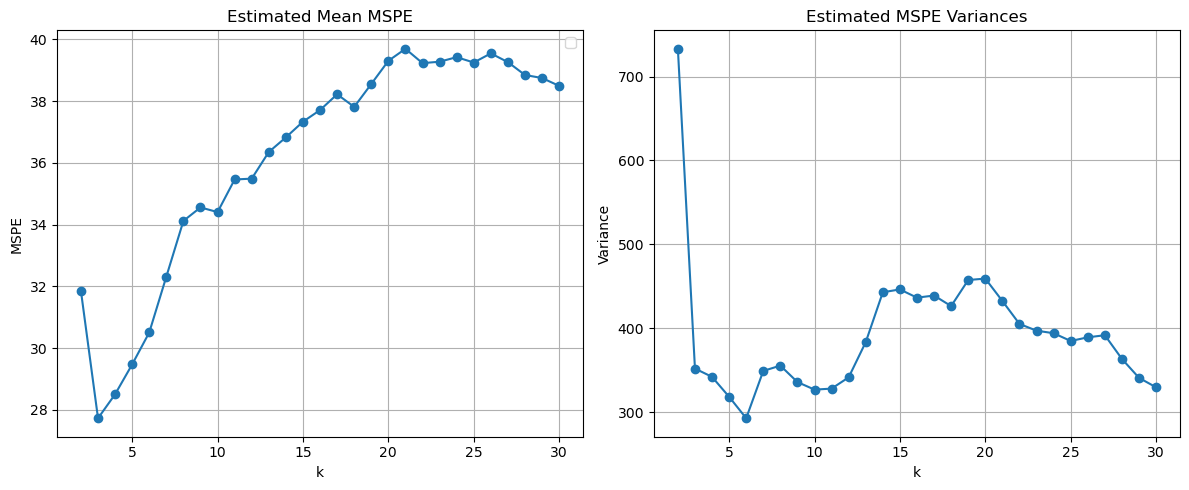

In [7]:
import matplotlib.pyplot as plt

# Extract keys and values from the dictionary
k_values = list(mspes.keys())
mspe_values = list(mspes.values())
var_values = list(vars.values())

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first graph on ax1
ax1.plot(k_values, mspe_values, marker='o', linestyle='-')
ax1.set_title('Estimated Mean MSPE')
ax1.set_xlabel('k')
ax1.set_ylabel('MSPE')
ax1.grid(True)
ax1.legend(loc='upper right')

# Plot the second graph on ax2 (assuming you have variances defined)
var_values = list(vars.values())
ax2.plot(k_values, var_values, marker='o', linestyle='-')
ax2.set_title('Estimated MSPE Variances')
ax2.set_xlabel('k')
ax2.set_ylabel('Variance')
ax2.grid(True)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plots
plt.show()

Nehme k=5

In [8]:
# Perform time series split
tscv = TimeSeriesSplit(n_splits=200, test_size=100)
indexes = list(range(100))

residuals = pd.DataFrame()
distances = pd.DataFrame()
for i in indexes:
    residuals[f'{i}'] = np.nan
    distances[f'{i}'] = np.nan

for train_index, test_index in tscv.split(X):

    print(f'start of iteration {i}')

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_test = np.array(y_test['energy_consumption'])

    # Create a KNeighborsRegressor instance
    knn_model = KNeighborsRegressor(
        n_neighbors=5, weights='distance')  # adjust
    knn_model.fit(X_train, y_train)

    # estimate forecast means
    mean_est = knn_model.predict(X_test).flatten()

    # residuals based on horizon
    residuals_est = y_test-mean_est

    # safe
    residuals.loc[len(residuals)] = residuals_est

    neigh_dist, neigh_ind = knn_model.kneighbors(X_test, 5)
    distances.loc[len(distances)] = np.mean(neigh_dist, axis=1)

residuals
distances

start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of i

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.938180,0.938180,0.938180,0.938180,0.938180,0.938180,0.938180,0.938180,0.938180,0.938180,...,1.193630,1.052502,1.154407,1.154407,1.154407,1.154407,1.156817,1.156817,1.156817,1.156817
1,1.063909,1.063909,1.063909,1.063909,1.063909,1.063909,1.063909,1.063909,1.063909,1.063909,...,1.281600,1.281600,1.281600,1.281600,1.281600,1.281600,1.281600,1.281600,1.281600,1.281600
2,1.188902,1.188902,1.188902,1.188902,1.188902,1.188902,1.188902,1.188902,1.188902,1.188902,...,0.846140,0.846140,0.846140,0.846140,0.846140,0.846140,0.846140,0.846140,0.846140,0.846140
3,0.816492,0.816492,0.816492,0.816492,0.816492,0.816492,0.816492,0.930729,0.938921,0.938921,...,1.090336,1.090336,1.090336,1.090336,1.090336,1.090336,1.123506,1.123506,1.123506,1.123506
4,1.035098,1.035098,1.035098,1.046693,1.046693,1.046693,1.046693,1.046693,1.046693,1.046693,...,0.791331,0.791331,0.791331,0.791331,0.791331,0.791331,0.791331,0.791331,0.791331,1.577675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.331371,1.331371,1.331371,1.331371,1.331371,1.331371,1.331371,1.624386,1.680103,1.680103,...,1.750171,1.750171,1.750171,1.750171,1.750171,1.750171,1.750171,1.750171,1.750171,1.750171
196,1.331371,1.331371,1.331371,1.243398,1.268879,1.268879,1.268879,1.268879,1.268879,1.268879,...,1.152455,1.152455,1.152455,1.152455,1.152455,1.152455,1.152455,1.152455,1.152455,0.849926
197,0.986291,0.986291,0.986291,0.986291,0.986291,0.986291,0.986291,0.986291,0.986291,0.986291,...,1.181451,1.181451,1.181451,1.181451,1.181451,1.552932,1.634221,1.634221,1.634221,1.634221
198,1.306319,1.306319,1.306319,1.306319,1.306319,1.306319,1.306319,1.306319,1.306319,1.306319,...,1.321428,1.323137,1.325379,1.325379,1.325379,1.325379,1.325379,1.325379,1.325379,1.325379


In [9]:
row_means = neigh_dist.mean(axis=1)
row_means

array([1.23290906, 1.23290906, 1.23290906, 1.23290906, 1.23290906,
       1.23290906, 1.23290906, 1.23290906, 1.23290906, 1.23290906,
       1.23290906, 1.23290906, 1.23290906, 1.23290906, 1.23290906,
       0.97262441, 1.08746141, 1.08746141, 1.08746141, 1.08746141,
       1.08746141, 1.08746141, 1.08746141, 1.08746141, 1.08746141,
       1.08746141, 1.08746141, 1.08746141, 1.08746141, 1.08746141,
       1.08746141, 1.08746141, 1.08746141, 1.08746141, 1.08746141,
       1.08746141, 1.08746141, 1.08746141, 1.08746141, 0.99282498,
       0.99282498, 0.99282498, 0.99282498, 0.99282498, 0.99282498,
       0.99282498, 0.99282498, 0.99282498, 0.99282498, 0.99282498,
       0.99282498, 0.99282498, 0.99282498, 0.99282498, 0.99282498,
       0.99282498, 0.99282498, 0.99282498, 0.99282498, 0.99282498,
       0.99282498, 0.99282498, 0.99282498, 1.39535631, 1.39535631,
       1.39535631, 1.39535631, 1.39535631, 1.39535631, 1.39535631,
       1.39535631, 1.39535631, 1.39535631, 1.39535631, 1.39535

In [10]:
residuals

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.573892,2.332275,3.442080,4.530982,4.988922,5.433242,5.831830,5.116636,5.375334,4.973526,...,-0.972596,-1.630176,-1.225526,-1.597638,-1.751755,-2.162842,-1.939032,-4.212682,-4.943461,-3.945979
1,-1.667819,-0.983029,-0.034585,-0.651043,-1.191135,-1.373240,-1.243357,-1.260348,-0.981914,0.423432,...,4.684565,4.393814,4.296271,5.054375,5.825914,5.998567,5.208309,4.887430,4.725190,4.331381
2,8.919886,8.620022,7.805773,8.416503,8.036325,7.407549,7.025388,6.589605,5.197021,3.111417,...,6.059177,7.458027,7.872037,8.558547,9.235539,8.467807,8.448669,7.843410,7.485668,7.075957
3,6.730343,6.793732,6.770774,7.001269,6.262165,5.032049,4.398470,3.602690,2.800570,2.559340,...,4.788159,4.061380,3.358548,2.656313,2.512827,2.939684,3.264944,4.112203,3.760463,4.072263
4,1.776322,1.139239,0.130183,1.393592,1.293018,0.621180,0.661852,0.184746,-0.489341,-1.868921,...,4.376797,3.583400,3.793807,3.779185,3.621876,4.697382,3.523248,2.925367,2.252542,1.152818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,16.165600,16.857100,16.039850,13.789350,11.337350,9.423350,6.301850,-0.811927,-0.532050,-0.766106,...,-6.964628,-6.554535,-7.291840,-7.382050,-6.882518,-6.286630,-5.011048,-4.816508,-4.587023,-4.045064
196,10.136323,9.423073,7.797823,3.216750,2.284129,2.146495,2.732127,3.161425,5.168212,10.827487,...,8.311182,8.502855,8.886120,8.189694,8.880046,8.251661,6.930819,5.875317,4.162898,2.497294
197,1.074355,0.876965,0.661013,0.610705,1.339690,4.591039,6.558981,6.581026,6.361790,7.239425,...,3.698925,2.978471,3.468879,3.202296,2.924565,6.319701,4.808697,5.105159,5.409794,6.117415
198,5.268762,11.837784,14.890437,17.237977,17.990104,19.333506,19.582918,19.054278,17.597046,15.892194,...,-0.134120,3.532815,1.168302,0.801821,0.211152,-0.085083,-0.567393,-1.528720,-1.927074,-1.240289


In [11]:
list_names = []
for i in indexes: 
    name = f'index_{i}'
    list_names.append(name)
residuals.rename(columns=dict(
    zip(residuals.columns,list_names)), inplace=True)

distances_means = distances.mean(axis=0)
simulated_distances = pd.DataFrame({'index': indexes, 'mean_distance': distances_means})

# export residuals to avoid additional computational effort
residuals.to_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\residuals.csv', index=False)


# export distances to avoid additional computational effort
simulated_distances.to_csv(
     'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\distances.csv', index=False)

In [5]:
# import residuals to avoid additional computational effort
simulated_residuals = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\residuals.csv')
# import distances to avoid additional computational effort
simulated_distances = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\distances.csv')

In [6]:
residuals_means = simulated_residuals.mean()
residuals_variances = simulated_residuals.var()
residuals_variances
df_descriptive = pd.DataFrame({'mean': residuals_means,
                               'variance': residuals_variances})
df_descriptive # zeigt: trend nach unten

,mean,variance
index_0,4.730525,31.718674
index_1,4.899242,32.769122
index_2,4.953384,34.600064
index_3,4.973481,33.128963
index_4,4.871426,33.419970
...,...,...
index_95,1.115015,19.558184
index_96,1.102893,18.478701
index_97,1.170214,19.042755
index_98,1.181736,19.661810


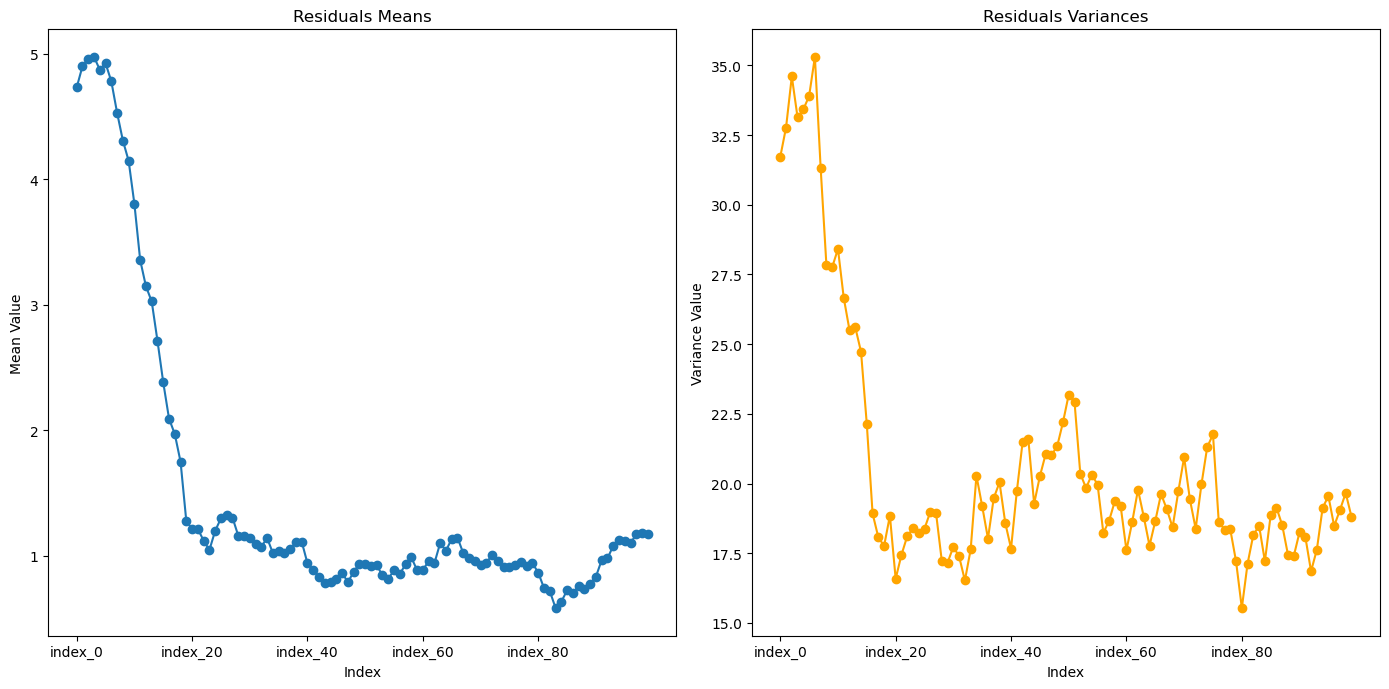

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a data frame from the calculated means and variances
characteristics_df = pd.DataFrame(
    {'Means': residuals_means, 'Variances': residuals_variances})

# Plotting
plt.figure(figsize=(14, 7))  # Adjusted the figure size for better visibility

# Plot Means
plt.subplot(1, 2, 1)
# Use plt.plot() for lines
plt.plot(characteristics_df.index, characteristics_df['Means'], marker='o')
plt.title('Residuals Means')
plt.xlabel('Index')
plt.ylabel('Mean Value')
# Set x-axis ticks with a step of 10
plt.xticks(characteristics_df.index[::(len(characteristics_df) // 5)])

# Plot Variances
plt.subplot(1, 2, 2)
# Use plt.plot() for lines
plt.plot(characteristics_df.index,
         characteristics_df['Variances'], color='orange', marker='o')
plt.title('Residuals Variances')
plt.xlabel('Index')
plt.ylabel('Variance Value')
plt.xticks(characteristics_df.index[::(len(characteristics_df) // 5)])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Residuenanalyse zeigt: Tendenz, positiv abzuweichen --> korrigiere Schätzung um Residuals mean

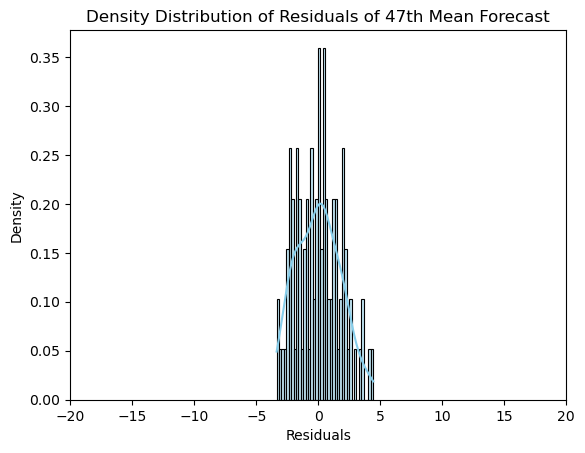

In [15]:
import seaborn as sns

array_47 = np.array(residuals.iloc[47]-np.mean(residuals.iloc[47]))

# Create a density plot using seaborn
sns.histplot(array_47, kde=True, stat="density", color="skyblue", bins=40)

# Add labels and title
plt.xlabel('Residuals')
plt.xlim(-20,20)
plt.ylabel('Density')
plt.title('Density Distribution of Residuals of 47th Mean Forecast')

# Show the plot
plt.show()

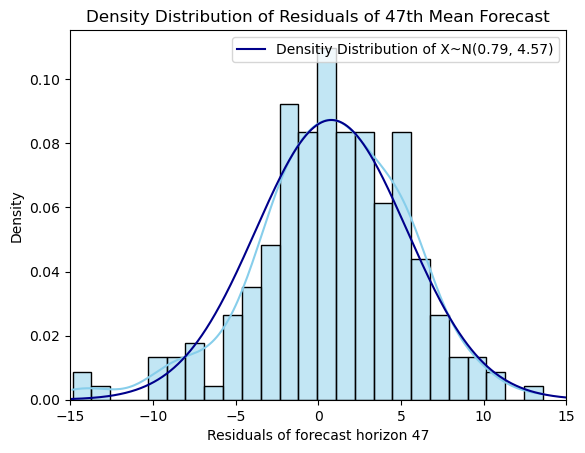

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# Your existing data
array_47 = np.array(residuals.iloc[:, 47])
std_47 = round(np.std(residuals.iloc[:, 47]), 2)
mean_47 = round(np.mean(residuals.iloc[:, 47]), 2)

# Create a density plot using seaborn
sns.histplot(array_47, kde=True, stat="density", color="skyblue", bins=25)

# Add labels and title
plt.xlabel('Residuals of forecast horizon 47')
plt.xlim(-15, 15)
plt.ylabel('Density')
plt.title('Density Distribution of Residuals of 47th Mean Forecast')

# Plot standard normal distribution (mean=0, std=1)
x = np.linspace(-15, 15, 1000)
plt.plot(x, norm.pdf(x, mean_47, std_47),
         label=f'Densitiy Distribution of X~N({mean_47}, {std_47})', color='darkblue')

# Show legend
plt.legend()

# Show the plot
plt.show()

Interpretation: keine Normalverteilungsannahme möglich --> Berechne Quantile mit empirischer Verteilung der Residuen
Daher auch keine std_to add --> bereits mit drinnen (?)

Fragen: 
* wenn mit empirischer Verteilung der Quantile: muss ich Quantil der NV mitreinbringen? Zusätzliches Rauschen integrieren?

In [7]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor

from energy_consumption.feature_selection.extract import extract_energy_data, extract_all_features
from energy_consumption.help_functions.drop_years import drop_years
from energy_consumption.help_functions import get_forecast_timestamps, create_submission_frame

In [61]:
energydata = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\feature_selection\\data\\historical_data.csv')
energydata['date_time'] = pd.to_datetime(
    energydata['date_time'], format='%Y-%m-%d %H:%M:%S')
energydata = energydata.set_index("date_time")
energydata

,energy_consumption
date_time,
2016-12-26 00:00:00,41.81025
2016-12-26 01:00:00,39.73950
2016-12-26 02:00:00,38.78525
2016-12-26 03:00:00,38.96900
2016-12-26 04:00:00,39.18750
...,...
2023-11-22 08:00:00,65.75125
2023-11-22 09:00:00,67.40950
2023-11-22 10:00:00,68.26775


In [64]:
residuals = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\residuals.csv')
distances = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\distances.csv')


def get_quantiles(mean_est, neighbor_distances, indexes, quantiles):

    mean_est = np.array(mean_est)
    quantile_df = pd.DataFrame()

    # variance
    mean_residuals = np.array(residuals.mean(axis=0))
    std_dev_residuals = np.array(residuals.std(axis=0))
    mean_corr = np.array(mean_est) - mean_residuals
    mean_distance = np.array(neighbor_distances.mean(axis=1))
    distance_ratio = distances.iloc[i, 1]

    for i in indexes:
            # weighten percentiles by distance ration
        mean_distance = np.mean(neighbor_distances[i])
        distance_ratio = mean_distance/distances.iloc[i, 1]

        # estimate quantile
        name = f'index_{i}'
        quantile_df.loc[i] = np.array(
            mean_est[i] + distance_ratio*np.percentile(residuals[name], quantiles))


    for q in quantiles:
        quantile_df[f'q{q}'] = mean_corr + \
                std_dev_residuals*norm.ppf(q, loc=0) 

    return quantile_df

In [65]:
distances

,index,mean_distance
0,0,1.136216
1,1,1.136216
2,2,1.136216
3,3,1.143181
4,4,1.148139
...,...,...
95,95,1.312529
96,96,1.326931
97,97,1.326931
98,98,1.326931


In [59]:

np.array(distances['mean_distance'])

array([1.13621602, 1.13621602, 1.13621602, 1.14318145, 1.14813885,
       1.14813885, 1.14813885, 1.15626679, 1.16490903, 1.16490903,
       1.16490903, 1.1749561 , 1.18082501, 1.18082501, 1.18082501,
       1.19062759, 1.19963407, 1.19963407, 1.19963407, 1.20769896,
       1.21555884, 1.21555884, 1.21555884, 1.22798961, 1.24920347,
       1.24920347, 1.24920347, 1.25881277, 1.26493729, 1.26493729,
       1.26493729, 1.27185647, 1.27835197, 1.27835197, 1.27835197,
       1.27088284, 1.27546977, 1.27546977, 1.27546977, 1.27207584,
       1.27958782, 1.27958782, 1.27958782, 1.2788273 , 1.28453225,
       1.28453225, 1.28453225, 1.2860677 , 1.2996746 , 1.2996746 ,
       1.2996746 , 1.29450874, 1.29986294, 1.29986294, 1.29986294,
       1.28946195, 1.29595775, 1.29595775, 1.29595775, 1.29952281,
       1.30503881, 1.30503881, 1.30503881, 1.3063365 , 1.31215847,
       1.31215847, 1.31215847, 1.3063382 , 1.31267373, 1.31267373,
       1.31267373, 1.30021334, 1.31514678, 1.31514678, 1.31514

In [195]:
residuals = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\residuals.csv')
distances = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\distances.csv')

def get_quantiles(mean_est, neighbor_distances, quantiles):

    quantile_df = pd.DataFrame()
    quantiles = (np.array(quantiles))

    mean_distances = np.array(distances['mean_distance'])
    distance_specific = neighbor_distances.mean(axis=1)  
    distance_ratio = (distance_specific/mean_distances)#durch?

    mean_residuals = np.array(residuals.mean(axis=0))
    mean_corr = np.array(mean_est) - mean_residuals

    std_dev_residuals = np.array(residuals.std(axis=0))
    for q in quantiles:
        quantile_df[f'q{q}'] = mean_corr+distance_ratio*norm.ppf(q, loc=0)*std_dev_residuals*(0.75)
        
    return quantile_df

In [196]:
def get_KNNRegression_forecasts(energydata=np.nan, indexes=[47, 51, 55, 71, 75, 79], quantiles=[0.025, 0.25, 0.5, 0.75, 0.975], periods=100, abs_eval = False):

    if type(energydata) == float:
        # use derived optimum for number of years
        energydata = extract_energy_data.get_data(num_years=0.25) # change to 7

    energydata = extract_all_features.get_energy_and_standardized_features2(
        energydata, knn=True)

    X = energydata.drop(columns=['energy_consumption'])
    y = energydata['energy_consumption']

    # create dataframe to store forecast quantiles
    energyforecast = get_forecast_timestamps.forecast_timestamps(
        energydata.index[-1])

    X_pred = extract_all_features.get_energy_and_standardized_features2(
        energyforecast, knn=True)

    X, X_pred = drop_years(X, X_pred)

    # fit KNNRegression with best k
    knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance')

    # Fit the model on the scaled data
    knn_model.fit(X, y)

    # estimate forecast mean
    mean_est = knn_model.predict(X_pred)
    neighbor_distances, neighbor_indizes = knn_model.kneighbors(X_pred, 5)

    # estimate quantile forecasts
    quantile_forecasts = get_quantiles(
        mean_est, neighbor_distances, quantiles).iloc[indexes]

    # return quantile forecasts in terms of absolute evaluation
    if abs_eval == True:
        horizon = pd.date_range(start=energydata.index[-1] + pd.DateOffset(
            hours=1), periods=periods, freq='H')
        quantile_forecasts.insert(
            0, 'date_time', [horizon[i] for i in indexes])

        return quantile_forecasts

    # else: create submission frame
    else:
        forecast_frame = create_submission_frame.get_frame(
            quantile_forecasts, indexes)
        forecast_frame = forecast_frame.drop(columns={'index'})
        horizon = pd.date_range(start=energydata.index[-1] + pd.DateOffset(
            hours=1), periods=periods, freq='H')
        forecast_frame.insert(
            0, 'date_time', [horizon[i] for i in indexes])

        return forecast_frame

In [197]:
nd = get_KNNRegression_forecasts(energydata, indexes = list(range(20)), quantiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], abs_eval = True)
nd

2016-12-26 00:00:00
2023-11-23 12:00:00
2023-11-22 13:00:00
2023-11-27 16:00:00


,date_time,q0.1,q0.2,q0.3,q0.4,q0.5,q0.6,q0.7,q0.8,q0.9
0,2023-11-22 13:00:00,43.031534,47.392279,50.536683,53.223460,55.734726,58.245992,60.932769,64.077173,68.437918
1,2023-11-22 14:00:00,41.764459,46.196825,49.392872,52.123777,54.676288,57.228799,59.959704,63.155751,67.588117
2,2023-11-22 15:00:00,40.495770,45.050280,48.334402,51.140563,53.763414,56.386265,59.192426,62.476548,67.031058
3,2023-11-22 16:00:00,40.001227,44.430708,47.624675,50.353803,52.904652,55.455502,58.184629,61.378597,65.808078
4,2023-11-22 17:00:00,40.373591,44.803274,47.997388,50.726640,53.277606,55.828573,58.557825,61.751938,66.181622
5,2023-11-22 18:00:00,40.667674,45.128900,48.345759,51.094446,53.663577,56.232709,58.981395,62.198254,66.659480
6,2023-11-22 19:00:00,40.450654,45.003401,48.286251,51.091326,53.713162,56.334998,59.140072,62.422923,66.975669
7,2023-11-22 20:00:00,40.106320,44.364039,47.434154,50.057454,52.509390,54.961325,57.584625,60.654740,64.912459
8,2023-11-22 21:00:00,39.479435,43.463050,46.335516,48.789933,51.084017,53.378101,55.832518,58.704984,62.688599
9,2023-11-22 22:00:00,37.121609,41.100809,43.970093,46.421789,48.713331,51.004873,53.456570,56.325853,60.305054


In [214]:
pit_merged = pd.DataFrame(columns=['date_time', 'q0.1', 'q0.2', 'q0.3', 'q0.4', 'q0.5', 'q0.6',
                                   'q0.7', 'q0.8', 'q0.9', 'energy_consumption'])
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in range(1, 10):
    print(f'start of round {i}')
    forecasts = get_KNNRegression_forecasts(energydata[:i*(-168)],
                                       indexes=list(range(100)),
                                       quantiles=quantiles, abs_eval=True)
    obs = energydata[i*(-168):i*(-168)+100].reset_index()
    forecasts_obs = forecasts.merge(obs, how='left', on='date_time')
    pit_merged = pd.concat([pit_merged, forecasts_obs])

start of round 1
2016-12-26 00:00:00
2023-11-16 12:00:00
2023-11-15 13:00:00
2023-11-20 16:00:00
start of round 2
2016-12-26 00:00:00
2023-11-09 12:00:00
2023-11-08 13:00:00
2023-11-13 16:00:00
start of round 3
2016-12-26 00:00:00
2023-11-02 12:00:00
2023-11-01 13:00:00
2023-11-06 16:00:00
start of round 4
2016-12-26 00:00:00
2023-10-26 12:00:00
2023-10-25 13:00:00
2023-10-30 16:00:00
start of round 5
2016-12-26 00:00:00
2023-10-19 12:00:00
2023-10-18 13:00:00
2023-10-23 16:00:00
start of round 6
2016-12-26 00:00:00
2023-10-12 12:00:00
2023-10-11 13:00:00
2023-10-16 16:00:00
start of round 7
2016-12-26 00:00:00
2023-10-05 12:00:00
2023-10-04 13:00:00
2023-10-09 16:00:00
start of round 8
2016-12-26 00:00:00
2023-09-28 12:00:00
2023-09-27 13:00:00
2023-10-02 16:00:00
start of round 9
2016-12-26 00:00:00
2023-09-21 12:00:00
2023-09-20 13:00:00
2023-09-25 16:00:00


In [215]:
pit_merged

,date_time,q0.1,q0.2,q0.3,q0.4,q0.5,q0.6,q0.7,q0.8,q0.9,energy_consumption
0,2023-11-15 13:00:00,50.911995,54.488819,57.067961,59.271743,61.331564,63.391386,65.595168,68.174310,71.751134,65.83350
1,2023-11-15 14:00:00,49.428697,53.064267,55.685769,57.925745,60.019398,62.113050,64.353026,66.974528,70.610098,63.93950
2,2023-11-15 15:00:00,48.058796,51.794552,54.488295,56.789999,58.941347,61.092694,63.394399,66.088142,69.823898,63.17325
3,2023-11-15 16:00:00,47.151190,50.784394,53.404190,55.642708,57.734998,59.827287,62.065806,64.685601,68.318805,64.27325
4,2023-11-15 17:00:00,47.028630,50.662000,53.281915,55.520536,57.612921,59.705307,61.943928,64.563843,68.197213,66.69150
...,...,...,...,...,...,...,...,...,...,...,...
95,2023-09-24 12:00:00,52.942838,55.203868,56.834229,58.227313,59.529395,60.831477,62.224561,63.854922,66.115952,47.24200
96,2023-09-24 13:00:00,51.442616,53.616509,55.184039,56.523436,57.775338,59.027240,60.366636,61.934166,64.108059,45.11550
97,2023-09-24 14:00:00,49.844419,52.051242,53.642516,55.002201,56.273066,57.543931,58.903617,60.494891,62.701713,43.55900
98,2023-09-24 15:00:00,49.307380,51.549786,53.166718,54.548327,55.839684,57.131041,58.512650,60.129583,62.371989,43.11775


In [216]:
def find_first_quantile(row):
    quantile_columns = [f'q{quantile}' for quantile in quantiles]
    for quantile_col in quantile_columns:
        if row['energy_consumption'] < row[quantile_col]:
            return quantile_col
    return 'q1'


# Apply the function to each row
pit_merged['first_quantile'] = pit_merged.apply(find_first_quantile, axis=1)
quantile_counts = pit_merged['first_quantile'].value_counts()

# order quantiles for final plot
ordered_quantile_counts = {}
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for q in quantiles:
    if f'q{q}' in quantile_counts.index:
        ordered_quantile_counts[q] = quantile_counts.loc[f'q{q}']
    else:
        ordered_quantile_counts[q] = 0

ordered_quantile_counts

{0.1: 112,
 0.2: 112,
 0.3: 127,
 0.4: 82,
 0.5: 89,
 0.6: 77,
 0.7: 106,
 0.8: 84,
 0.9: 73,
 1: 38}

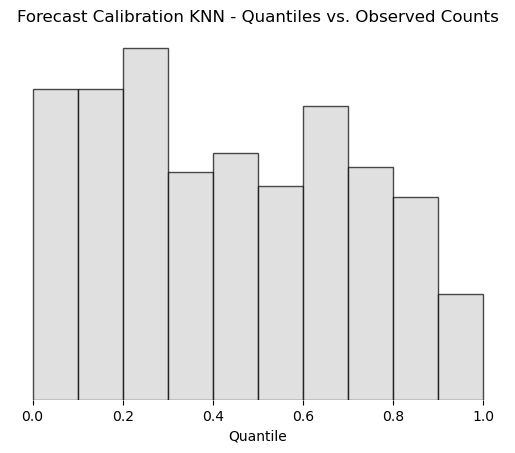

In [217]:
import matplotlib.pyplot as plt 

counts = list(ordered_quantile_counts.values())
bar_width = 0.1

quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# Centering the bars on the left-hand side of their ticks
plt.bar([q - bar_width for q in quantiles], counts,
        width=bar_width, color='lightgrey', alpha=0.7, align='edge', edgecolor='black')
plt.xlabel('Quantile')
plt.yticks([])
# Alternatively: observed counts in each quantile range
plt.title('Forecast Calibration KNN - Quantiles vs. Observed Counts')
plt.box(False)
plt.show()

Do the same with new data

In [1]:
from energy_consumption.feature_selection.extract import extract_energy_data
energydata = extract_energy_data.get_data()

100%|██████████| 364/364 [04:11<00:00,  1.45it/s]


In [9]:
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import norm

residuals = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\residuals.csv')
distances = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\distances.csv')


def get_quantiles(mean_est, neighbor_distances, quantiles):

    quantile_df = pd.DataFrame()
    quantiles = (np.array(quantiles))

    mean_distances = np.array(distances['mean_distance'])
    distance_specific = neighbor_distances.mean(axis=1)
    distance_ratio = (distance_specific/mean_distances)  # durch?

    mean_residuals = np.array(residuals.mean(axis=0))
    mean_corr = np.array(mean_est) - mean_residuals

    std_dev_residuals = np.array(residuals.std(axis=0))
    for q in quantiles:#chanted to mean est
        quantile_df[f'q{q}'] = mean_est+distance_ratio*norm.ppf(q, loc=0)*std_dev_residuals*(0.75)

    return quantile_df

In [4]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor

from energy_consumption.feature_selection.extract import extract_energy_data, extract_all_features
from energy_consumption.help_functions.drop_years import drop_years
from energy_consumption.help_functions import get_forecast_timestamps, create_submission_frame


def get_KNNRegression_forecasts(energydata=np.nan, indexes=[47, 51, 55, 71, 75, 79], quantiles=[0.025, 0.25, 0.5, 0.75, 0.975], periods=100, abs_eval=False):

    if type(energydata) == float:
        # use derived optimum for number of years
        energydata = extract_energy_data.get_data(
            num_years=0.25)  # change to 7

    energydata = extract_all_features.get_energy_and_standardized_features2(
        energydata, knn=True)

    X = energydata.drop(columns=['energy_consumption'])
    y = energydata['energy_consumption']

    # create dataframe to store forecast quantiles
    energyforecast = get_forecast_timestamps.forecast_timestamps(
        energydata.index[-1])

    X_pred = extract_all_features.get_energy_and_standardized_features2(
        energyforecast, knn=True)

    X, X_pred = drop_years(X, X_pred)

    # fit KNNRegression with best k
    knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance')

    # Fit the model on the scaled data
    knn_model.fit(X, y)

    # estimate forecast mean
    mean_est = knn_model.predict(X_pred)
    neighbor_distances, neighbor_indizes = knn_model.kneighbors(X_pred, 5)

    # estimate quantile forecasts
    quantile_forecasts = get_quantiles(
        mean_est, neighbor_distances, quantiles).iloc[indexes]

    # return quantile forecasts in terms of absolute evaluation
    if abs_eval == True:
        horizon = pd.date_range(start=energydata.index[-1] + pd.DateOffset(
            hours=1), periods=periods, freq='H')
        quantile_forecasts.insert(
            0, 'date_time', [horizon[i] for i in indexes])

        return quantile_forecasts

    # else: create submission frame
    else:
        forecast_frame = create_submission_frame.get_frame(
            quantile_forecasts, indexes)
        forecast_frame = forecast_frame.drop(columns={'index'})
        horizon = pd.date_range(start=energydata.index[-1] + pd.DateOffset(
            hours=1), periods=periods, freq='H')
        forecast_frame.insert(
            0, 'date_time', [horizon[i] for i in indexes])

        return forecast_frame

In [10]:
pit_merged = pd.DataFrame(columns=['date_time', 'q0.1', 'q0.2', 'q0.3', 'q0.4', 'q0.5', 'q0.6',
                                   'q0.7', 'q0.8', 'q0.9', 'energy_consumption'])
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# extend range to get more accurate results
for i in range(1, 8):
    print(f'start of round {i}')
    forecasts = get_KNNRegression_forecasts(energydata[:i*-168],
                                    indexes=list(range(80)),
                                    quantiles=quantiles, abs_eval=True)
    obs = energydata[i*(-168):i*(-168)+80].reset_index()
    forecasts_obs = forecasts.merge(obs, how='left', on='date_time')
    pit_merged = pd.concat([pit_merged, forecasts_obs])

# Insert a column 'q1' with inf values after 'q0.9'
column_index = pit_merged.columns.get_loc('q0.9') + 1
if 'q1' not in pit_merged.columns:
    pit_merged.insert(column_index, 'q1', float('inf'))

start of round 1
2017-02-06 00:00:00
2024-01-11 12:00:00
2024-01-10 13:00:00
2024-01-15 16:00:00
start of round 2
2017-02-06 00:00:00
2024-01-04 12:00:00
2024-01-03 13:00:00
2024-01-08 16:00:00
start of round 3
2017-02-06 00:00:00
2023-12-28 12:00:00
2023-12-27 13:00:00
2024-01-01 16:00:00
start of round 4
2017-02-06 00:00:00
2023-12-21 12:00:00
2023-12-20 13:00:00
2023-12-25 16:00:00
start of round 5
2017-02-06 00:00:00
2023-12-14 12:00:00
2023-12-13 13:00:00
2023-12-18 16:00:00
start of round 6
2017-02-06 00:00:00
2023-12-07 12:00:00
2023-12-06 13:00:00
2023-12-11 16:00:00
start of round 7
2017-02-06 00:00:00
2023-11-30 12:00:00
2023-11-29 13:00:00
2023-12-04 16:00:00


In [11]:
def find_first_quantile(row):
    quantile_columns = [f'q{quantile}' for quantile in quantiles]
    for quantile_col in quantile_columns:
        if row['energy_consumption'] < row[quantile_col]:
            return quantile_col
    return 'q1'


# Apply the function to each row
pit_merged['first_quantile'] = pit_merged.apply(find_first_quantile, axis=1)
quantile_counts = pit_merged['first_quantile'].value_counts()

# order quantiles for final plot
ordered_quantile_counts = {}
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for q in quantiles:
    if f'q{q}' in quantile_counts.index:
        ordered_quantile_counts[q] = quantile_counts.loc[f'q{q}']
    else:
        ordered_quantile_counts[q] = 0

ordered_quantile_counts

{0.1: 90,
 0.2: 46,
 0.3: 49,
 0.4: 59,
 0.5: 69,
 0.6: 51,
 0.7: 28,
 0.8: 38,
 0.9: 82,
 1: 48}

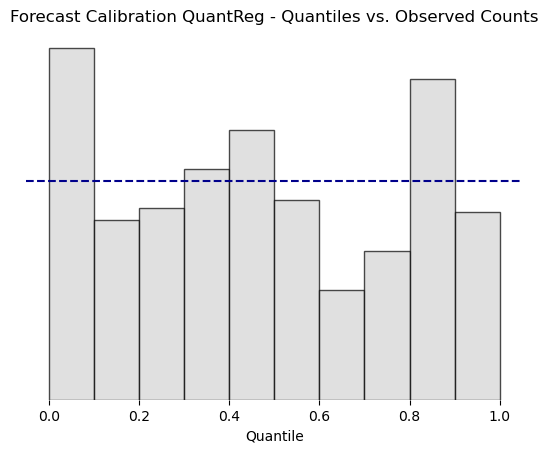

In [13]:
import matplotlib.pyplot as plt


def find_first_quantile(row):
    quantile_columns = [f'q{quantile}' for quantile in quantiles]
    for quantile_col in quantile_columns:
        if row['energy_consumption'] < row[quantile_col]:
            return quantile_col
    return 'q1'


# Apply the function to each row
pit_merged['first_quantile'] = pit_merged.apply(find_first_quantile, axis=1)
quantile_counts = pit_merged['first_quantile'].value_counts()

# order quantiles for final plot
ordered_quantile_counts = {}
for q in quantiles:
    if f'q{q}' in quantile_counts.index:
        ordered_quantile_counts[q] = quantile_counts.loc[f'q{q}']

counts = list(ordered_quantile_counts.values())
bar_width = 0.1

quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Calculate the mean of the y-values
mean_value = sum(counts) / len(counts)

# Plot mean
plt.axhline(y=mean_value, color='darkblue', linestyle='--', label='Mean')
# Centering the bars on the left-hand side of their ticks
plt.bar([q - bar_width for q in quantiles], counts,
        width=bar_width, color='lightgrey', alpha=0.7, align='edge', edgecolor='black')
plt.xlabel('Quantile')
plt.yticks([])
# Alternatively: observed counts in each quantile range
plt.title('Forecast Calibration QuantReg - Quantiles vs. Observed Counts')
plt.box(False)
plt.show()